In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings ('ignore')

In [5]:
df=pd.read_csv(r"D:\Data Science\Project\fake_bills__cleaned.csv", sep=',')
df

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
0,1,171.81,104.86,104.95,2.89,112.83,4.520000
1,1,171.46,103.36,103.66,2.99,113.09,3.770000
2,1,172.69,104.48,103.50,2.94,113.16,4.400000
3,1,171.36,103.91,103.94,3.01,113.51,3.620000
4,1,171.73,104.28,103.46,3.48,112.54,4.040000
...,...,...,...,...,...,...,...
1495,0,172.17,104.49,103.76,2.93,111.21,5.302069
1496,0,172.08,104.15,104.17,3.40,112.29,5.200358
1497,0,171.72,104.46,104.12,3.61,110.31,5.175468
1498,0,172.66,104.33,104.41,3.56,111.47,5.173450


## PCA

In [8]:
x = df.iloc[:,1:]
y= df['is_genuine']

In [9]:
s=StandardScaler()
x1=s.fit_transform(x)
x1

array([[-0.48653957,  2.77412327,  3.16324041, -1.128325  ,  0.17365114,
         0.0563237 ],
       [-1.63372936, -2.23653528, -0.79966777, -0.69679916,  0.47166629,
        -1.08059227],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.91256208,  0.55190114,
        -0.12558286],
       ...,
       [-0.78153123,  1.43794766,  0.61346228,  1.97866106, -2.71480344,
         1.04993944],
       [ 2.29949275,  1.00369058,  1.50434862,  1.76289814, -1.38519737,
         1.04688137],
       [-0.19154792,  0.83666863,  1.135706  ,  0.38201544, -1.36227312,
         1.1579961 ]])

In [10]:
pca=PCA()
pca_values=pca.fit_transform(x1)
pca_values

array([[ 1.64752398,  0.74687568,  2.39291535,  3.18640502,  0.30576617,
        -0.01194549],
       [-2.01970332, -2.20674552, -1.00261896,  0.0709126 ,  0.03725493,
        -0.47509937],
       [-0.96900713,  2.61932079,  1.20196657, -0.9213195 , -0.83779319,
         0.19721042],
       ...,
       [ 3.61755783, -0.44487944,  0.33992456, -0.91071859,  0.37064106,
        -1.03705178],
       [ 2.76531715,  2.48452537, -0.81856661, -0.10321789,  0.42204761,
        -0.04465403],
       [ 2.21387029,  0.04734698,  0.17537784,  0.44854801, -0.4254181 ,
        -0.22981579]])

In [11]:
var = pca.explained_variance_ratio_
var

array([0.43211292, 0.16957177, 0.1301927 , 0.11824046, 0.09663102,
       0.05325112])

In [12]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 43.21,  60.17,  73.19,  85.01,  94.67, 100.  ])

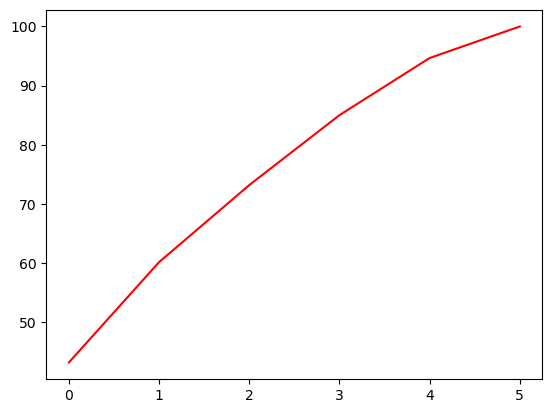

In [13]:
plt.plot(var1,color="red")

In [14]:
pca = PCA(n_components=4)
pca_values = pca.fit_transform(x1)
pca_values

array([[ 1.64752398,  0.74687568,  2.39291535,  3.18640502],
       [-2.01970332, -2.20674552, -1.00261896,  0.0709126 ],
       [-0.96900713,  2.61932079,  1.20196657, -0.9213195 ],
       ...,
       [ 3.61755783, -0.44487944,  0.33992456, -0.91071859],
       [ 2.76531715,  2.48452537, -0.81856661, -0.10321789],
       [ 2.21387029,  0.04734698,  0.17537784,  0.44854801]])

In [15]:
var = pca.explained_variance_ratio_
var

array([0.43211292, 0.16957177, 0.1301927 , 0.11824046])

In [16]:
df1= pd.DataFrame(pca_values, columns=['pc1','pc2','pc3','pc4'])
df1

,pc1,pc2,pc3,pc4
0,1.647524,0.746876,2.392915,3.186405
1,-2.019703,-2.206746,-1.002619,0.070913
2,-0.969007,2.619321,1.201967,-0.921319
3,-1.375629,-1.817808,0.646521,0.830747
4,0.150222,-0.566097,0.854019,-1.784685
...,...,...,...,...
1495,1.354191,0.903298,1.118973,-0.556256
1496,1.658666,0.476031,-0.359034,-0.048651
1497,3.617558,-0.444879,0.339925,-0.910719
1498,2.765317,2.484525,-0.818567,-0.103218


In [17]:
df1['is_genuine'] = y
df1

,pc1,pc2,pc3,pc4,is_genuine
0,1.647524,0.746876,2.392915,3.186405,1
1,-2.019703,-2.206746,-1.002619,0.070913,1
2,-0.969007,2.619321,1.201967,-0.921319,1
3,-1.375629,-1.817808,0.646521,0.830747,1
4,0.150222,-0.566097,0.854019,-1.784685,1
...,...,...,...,...,...
1495,1.354191,0.903298,1.118973,-0.556256,0
1496,1.658666,0.476031,-0.359034,-0.048651,0
1497,3.617558,-0.444879,0.339925,-0.910719,0
1498,2.765317,2.484525,-0.818567,-0.103218,0


## Random Forest

In [19]:
x=df1.iloc[:,:-1]
y=df1['is_genuine']

In [21]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [27]:
model=rf_model.fit(xtrain, ytrain)

In [28]:
rf_model.score(xtest,ytest)

0.9866666666666667

In [29]:
ypred = rf_model.predict(xtest)

In [30]:
ypred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1], d

In [31]:
confusion_matrix(ytest, ypred)

array([[ 96,   4],
       [  0, 200]], dtype=int64)

In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       100
           1       0.98      1.00      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300

